# DATA MINING PROJECT 2
Group members: Shalin, Rishita, Mrudula

## Objective

Our main goal for this project, as a consultant for a running footwear and clothing company, is to gather consumer feedback and make strategic decisions about the firm's running product and marketing. We have employed unsupervised machine learning methods for this. To determine if there are any critical running consumers, we employed clustering. Our recommendations are supported by data from a recent poll. End-to-end clustering analysis with in-depth annotations is included in the deliverables to support our suggestions.

## Importing libraries and overview of the dataset

In [31]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#importing clustering algorithms

#!pip install kmodes
from kmodes.kmodes import KModes
#!pip install gower
import gower
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

## Data Cleaning

In [2]:
df = pd.read_excel('survey_data.xlsx', usecols = 'C:AU')
df_description = pd.read_excel('survey_data.xlsx', sheet_name = 'Datamap', names = ['Id', 'Column', 'Value'], header = None, skiprows = 2)

In [3]:
df_description.fillna(method = 'ffill', inplace = True)
df_description

,Id,Column,Value
0,country,Country represented by participant (A1r1-A1r3).,NaN
1,country,0,Unchecked
2,country,1,Checked
3,country,S1r1,United States
4,country,S1r2,United Kingdom
...,...,...,...
73,Q7,Q7r1,Anything bright & bold
74,Q7,Q7r2,"Soft pastels - pink, coral, purple"
75,Q7,Q7r3,"Earth tones - greens, yellows, browns"
76,Q7,Q7r4,Neutrals - black & white


In [4]:
df_description

,Id,Column,Value
0,country,Country represented by participant (A1r1-A1r3).,NaN
1,country,0,Unchecked
2,country,1,Checked
3,country,S1r1,United States
4,country,S1r2,United Kingdom
...,...,...,...
73,Q7,Q7r1,Anything bright & bold
74,Q7,Q7r2,"Soft pastels - pink, coral, purple"
75,Q7,Q7r3,"Earth tones - greens, yellows, browns"
76,Q7,Q7r4,Neutrals - black & white


In [5]:
df.columns = [df_description.Id[i] +'_'+ str(df_description.Value[i]) for i in range(len(df_description)) if df_description.Column[i] in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 45 columns):
 #   Column                                                                                     Non-Null Count  Dtype
---  ------                                                                                     --------------  -----
 0   country_United States                                                                      175 non-null    int64
 1   country_United Kingdom                                                                     175 non-null    int64
 2   country_Japan                                                                              175 non-null    int64
 3   verification_Valid                                                                         175 non-null    int64
 4   verification_Invalid                                                                       175 non-null    int64
 5   gender_Male                                                     

## Data Analysis

We can not plot correlation matrix here because all the features are categorical features

In [7]:
pd.DataFrame([[df[x].value_counts(1)[1]*100, str(df[x].value_counts(1).name).split('_')[0], ''.join(str(df[x].value_counts(1).name).split('_')[1:])]
  for x in df.columns ], columns = ['Percentage','Question','Answer'])

,Percentage,Question,Answer
0,58.857143,country,United States
1,17.714286,country,United Kingdom
2,16.000000,country,Japan
3,86.285714,verification,Valid
4,14.857143,verification,Invalid
5,42.285714,gender,Male
6,45.142857,gender,Female
7,21.142857,age,Under 18
8,14.285714,age,18-24
9,22.285714,age,25-34


In [8]:
result = pd.DataFrame({
    'Percentage': [df[x].value_counts(1)[1]*100 for x in df.columns],
    'Question': [str(df[x].value_counts(1).name).split('_')[0] for x in df.columns],
    'Answer': [''.join(str(df[x].value_counts(1).name).split('_')[1:]) for x in df.columns]
})
result = result.groupby('Question').agg({'Answer': list, 'Percentage': 'sum'}).T
result

Question,Q1,Q2,Q3,Q4,Q5,Q6,Q7,age,country,gender,verification
Answer,"[Occasionally when the weather is nice., Fairl...",[A single pair that I use to go running in and...,"[I'm not sure, Foam, Rubber, Blend of foam & r...","[I don't run races, I use the same shoes I tra...","[Activities like yoga and pilates, Nothing out...","[I have no complaints!, They wear out too fast...","[Anything bright & bold, Soft pastels - pink, ...","[Under 18, 18-24, 25-34, 35-44, 45-54, Above 55]","[United States, United Kingdom, Japan]","[Male, Female]","[Valid, Invalid]"
Percentage,88.571429,90.285714,92.0,88.571429,127.428571,97.142857,94.285714,93.714286,92.571429,87.428571,101.142857


Observations

* Here, the total number of clients is greater than the sum of legitimate and invalid customers. This may indicate some data error.
* 13% of persons identify as having a 'other' gender.
* Only 8% of the population lives outside the US, UK, and Japan.
* Approximately 7% of respondents did not provide their age.


In [9]:
df[['verification_Valid', 'verification_Invalid']][df[['verification_Valid', 'verification_Invalid']].sum(axis = 1)>1 ]

,verification_Valid,verification_Invalid
16,1,1
106,1,1


In [10]:
df = df.drop([16, 106], inplace = False).reset_index(drop=True, inplace=False)

In [11]:
pd.DataFrame([[df[x].value_counts(1)[1]*100, str(df[x].value_counts(1).name).split('_')[0], ''.join(str(df[x].value_counts(1).name).split('_')[1:])]
  for x in df.columns ], columns = ['Percentage','Question','Answer']).groupby('Question').agg({'Answer': list, 'Percentage': 'sum'}).T

Question,Q1,Q2,Q3,Q4,Q5,Q6,Q7,age,country,gender,verification
Answer,"[Occasionally when the weather is nice., Fairl...",[A single pair that I use to go running in and...,"[I'm not sure, Foam, Rubber, Blend of foam & r...","[I don't run races, I use the same shoes I tra...","[Activities like yoga and pilates, Nothing out...","[I have no complaints!, They wear out too fast...","[Anything bright & bold, Soft pastels - pink, ...","[Under 18, 18-24, 25-34, 35-44, 45-54, Above 55]","[United States, United Kingdom, Japan]","[Male, Female]","[Valid, Invalid]"
Percentage,89.017341,90.17341,92.485549,89.017341,128.323699,97.687861,94.797688,93.063584,93.641618,88.439306,100.0


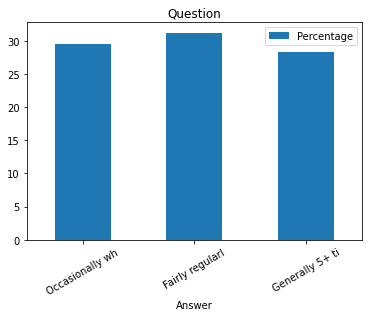

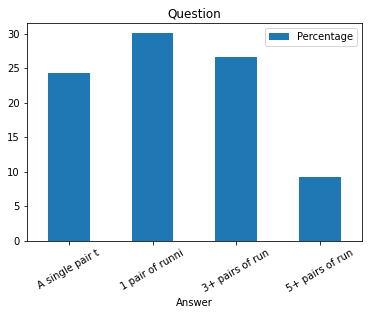

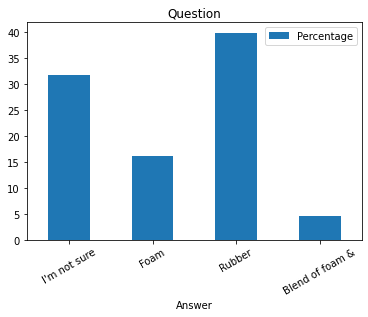

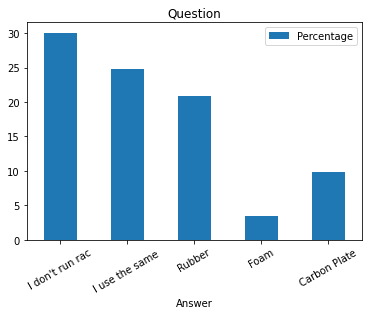

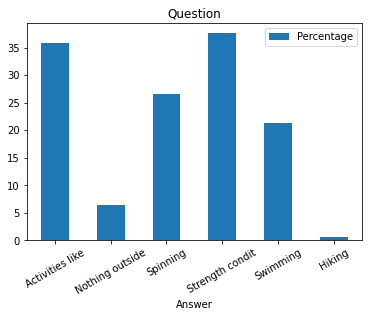

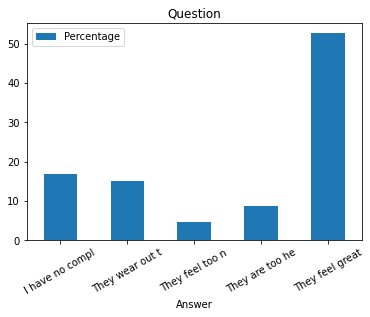

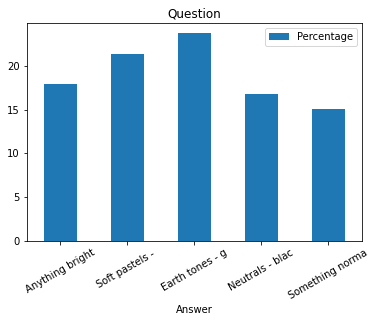

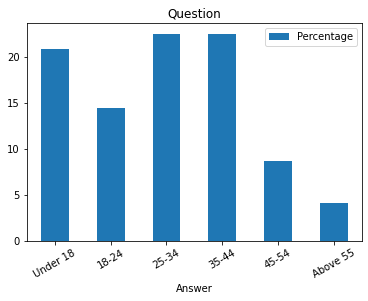

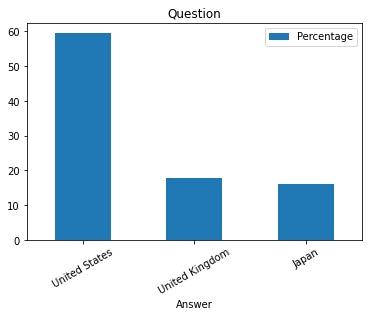

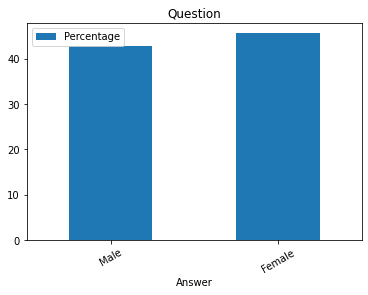

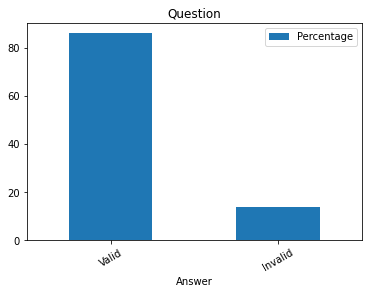

In [12]:
pd.DataFrame([[df[x].value_counts(1)[1]*100, str(df[x].value_counts(1).name).split('_')[0], ''.join(str(df[x].value_counts(1).name).split('_')[1:])[:15]]
              for x in df.columns ], columns = ['Percentage','Question','Answer']
            ).groupby('Question').plot(kind = 'bar', x = 'Answer',  rot = 30, title = 'Question')
plt.show()

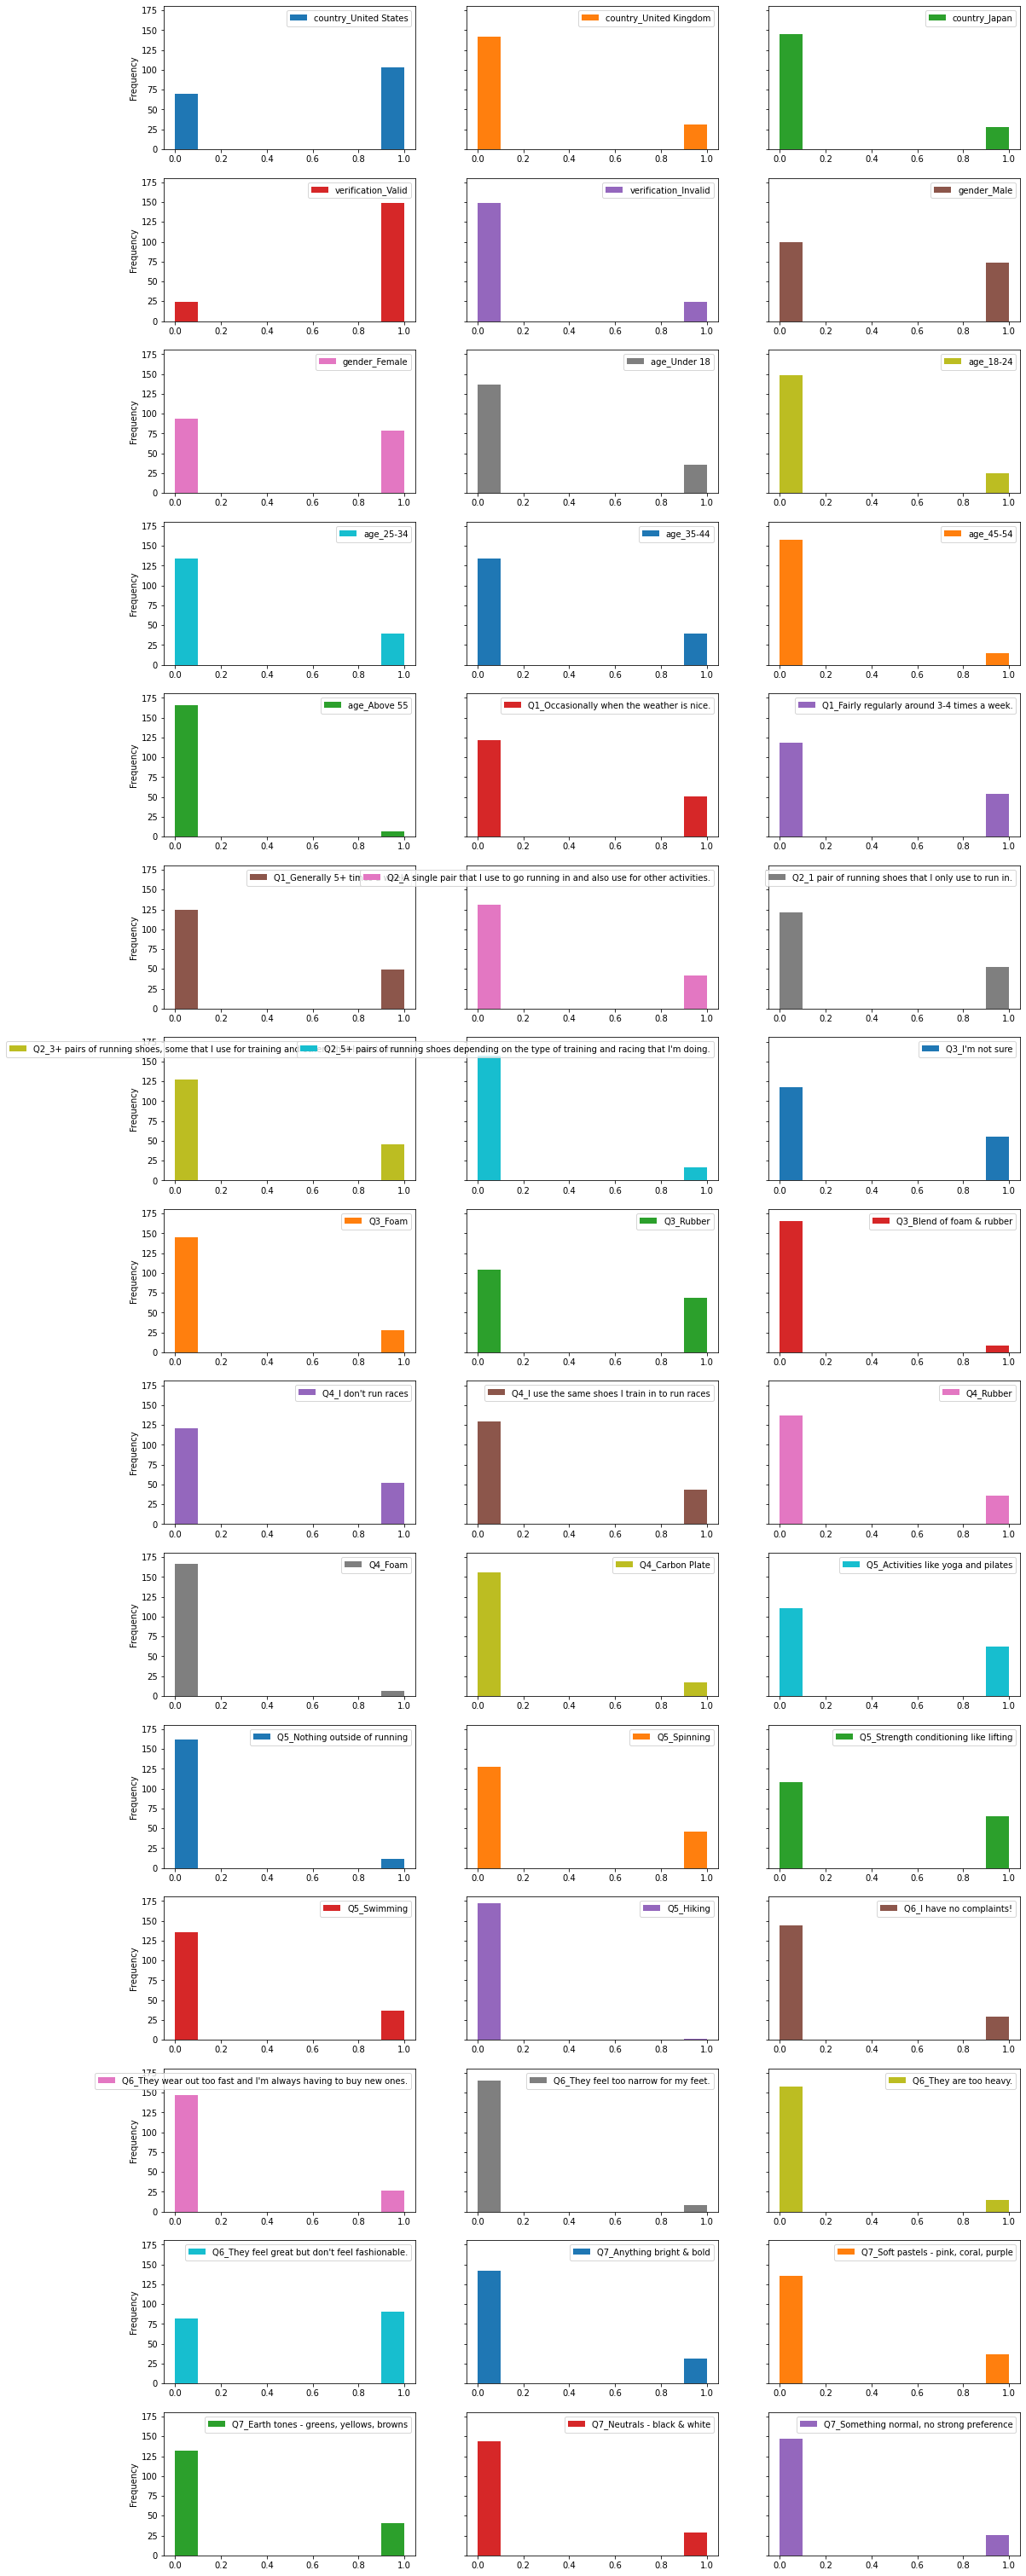

In [13]:
df.plot(kind = 'hist', subplots = True, layout=(15,3), figsize = (18,55), sharex = False, sharey = True)
plt.show()

In [14]:
print('Observations')
(["%05.2f" %(df[x].value_counts(1)[1]*100) + 
        ' % of Customers have answered ' + 
        str(df[x].value_counts(1).name).split('_')[0] +
        ' as ' + 
        ''.join(str(df[x].value_counts(1).name).split('_')[1:])
  for x in df.columns ])

Observations


['59.54 % of Customers have answered country as United States',
 '17.92 % of Customers have answered country as United Kingdom',
 '16.18 % of Customers have answered country as Japan',
 '86.13 % of Customers have answered verification as Valid',
 '13.87 % of Customers have answered verification as Invalid',
 '42.77 % of Customers have answered gender as Male',
 '45.66 % of Customers have answered gender as Female',
 '20.81 % of Customers have answered age as Under 18',
 '14.45 % of Customers have answered age as 18-24',
 '22.54 % of Customers have answered age as 25-34',
 '22.54 % of Customers have answered age as 35-44',
 '08.67 % of Customers have answered age as 45-54',
 '04.05 % of Customers have answered age as Above 55',
 '29.48 % of Customers have answered Q1 as Occasionally when the weather is nice.',
 '31.21 % of Customers have answered Q1 as Fairly regularly around 3-4 times a week.',
 '28.32 % of Customers have answered Q1 as Generally 5+ times a week.',
 '24.28 % of Custome

We can not apply PCA here cause these are categorical variable

In [15]:
#pca = PCA(n_components=2)
#df_pca = pca.fit_transform(df)

#plt.scatter(df_pca[:,0], df_pca[:,1])

#plt.show()

## Similarity Metric & Matrix

Gower's distance is a similarity measure that can be used for both numerical and categorical data. It is a distance metric that takes into account the differences between categorical variables and numerical variables, and it can handle missing values as well.

To calculate Gower's distance for a pair of data points, we first compute the distance for each variable separately, using a specific distance metric that is appropriate for the type of variable. For example, we might use the Euclidean distance for numerical variables and the Jaccard distance for categorical variables.

The Jaccard distance is a measure of dissimilarity between two sets. It is calculated as the ratio of the number of items that are not in both sets to the total number of items in the sets. The formula for the Jaccard distance is:

Jaccard distance = 1 - Jaccard similarity

where Jaccard similarity is calculated as:

Jaccard similarity = (number of items in both sets) / (number of items in either set)

In [16]:
# Similarity matrix

similarity_matrix = gower.gower_matrix(df.astype(object), cat_features = [True]*45)
similarity_matrix.shape

(173, 173)

## Clustering

### Kmeans

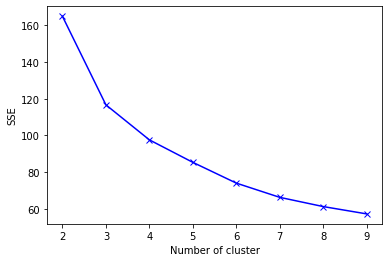

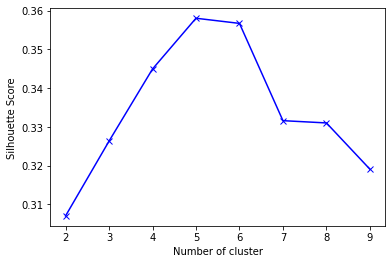

In [25]:
#Empty dictionary to store the SSE for each value of k
sse = {} 
sc = {}
# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(similarity_matrix)
    sse[k] = kmeans.inertia_ 
    labels = kmeans.predict(similarity_matrix)
    sc[k] = silhouette_score(similarity_matrix, labels)

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

### K-Mode Clustering

We will be doing K - Mode on our original data because all of our data is categorical data.

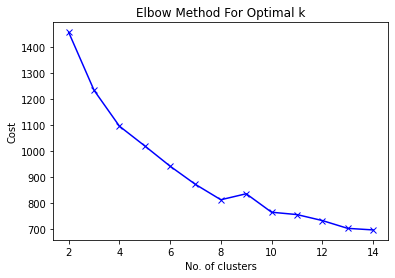

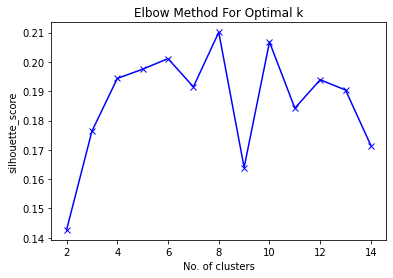

In [29]:
# Elbow curve to find optimal K

cost = []
s = []
K = range(2,15)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    s.append(silhouette_score(df, kmode.labels_))
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(K, s, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_score')
plt.title('Elbow Method For Optimal k')
plt.show()

## Hierarchial Clustering

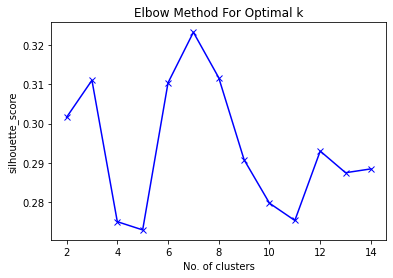

In [88]:
s = []
K = range(2,15)

for num_clusters in list(K):
    hac = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='complete', compute_distances=True).fit(distance_matrix)
    s.append(silhouette_score(distance_matrix, hac.labels_))
    
plt.plot(K, s, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_score')
plt.title('Elbow Method For Optimal k')
plt.show()

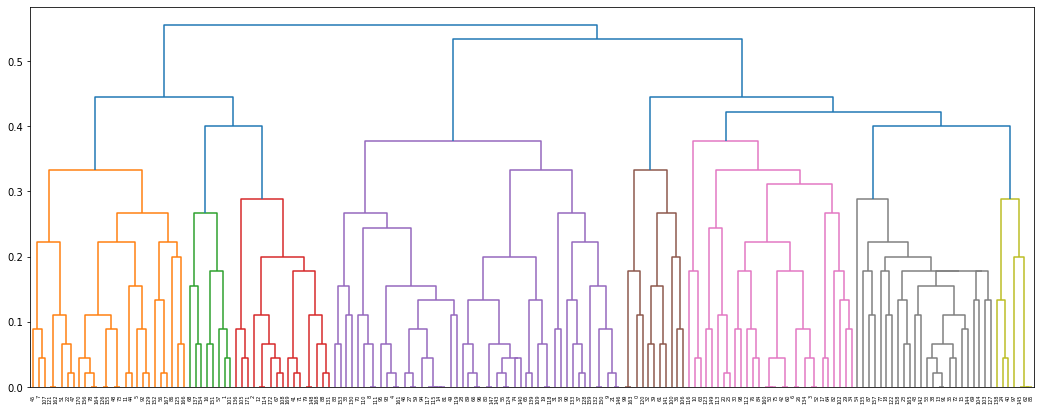

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize = (18,7))
plot_dendrogram(hac)

## Gaussian Mixture Clustering

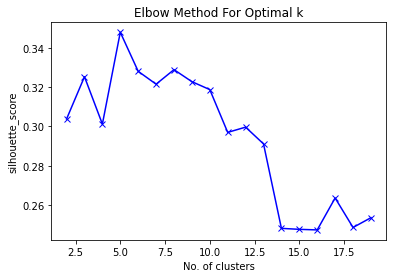

In [33]:
s = []
K = range(2,20)

for num_clusters in list(K):
    gmm = GaussianMixture(n_components = num_clusters, random_state = 1)
    gmm.fit(similarity_matrix)
    s.append(silhouette_score(similarity_matrix, gmm.predict(similarity_matrix)))
    
plt.plot(K, s, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_score')
plt.title('Elbow Method For Optimal k')
plt.show()

## Interpreting Results

Here every clustering algorithm gave us different number of optimal clusters.

* Kmeans == 5
* Kmode == 8
* Hierarchical == 7
* Gaussian Mixture == 5

Here we will go with Kmeans as it gives highest silhouette_score and also Gaussian Mixture creates same number of clusters

In [36]:
df['Labels'] = KMeans(n_clusters=5, random_state=1).fit(similarity_matrix).labels_

In [39]:
df.Labels.value_counts(1)*100 # % of data points in a given cluster

1    28.323699
0    27.167630
4    16.763006
2    13.872832
3    13.872832
Name: Labels, dtype: float64

In [56]:
results = ((df.groupby('Labels').mean()*100).T).reset_index()

In [64]:
results['Questions'] = results['index'].apply(lambda x: x.split('_')[0])

In [65]:
results['Answers'] = results['index'].apply(lambda x: ' '.join(x.split('_')[1:]))

In [145]:
results.groupby(['Questions', 'Answers']).mean(numeric_only = True)

Labels                                                                    0  \
Questions    Answers                                                          
Q1           Fairly regularly around 3-4 times a week.             2.127660   
             Generally 5+ times a week.                           97.872340   
             Occasionally when the weather is nice.                0.000000   
Q2           1 pair of running shoes that I only use to run in.    0.000000   
             3+ pairs of running shoes, some that I use for ...   70.212766   
             5+ pairs of running shoes depending on the type...   29.787234   
             A single pair that I use to go running in and a...    0.000000   
Q3           Blend of foam & rubber                                0.000000   
             Foam                                                 25.531915   
             I'm not sure                                          0.000000   
             Rubber                                               74.468085   
Q4           Carbon Plate                                         34.042553   
             Foam                                                  4.255319   
             I don't run races                                     0.000000   
             I use the same shoes I train in to run races          0.000000   
             Rubber                                               59.574468   
Q5           Activities like yoga and pilates                      0.000000   
             Hiking                                                0.000000   
             Nothing outside of running                            0.000000   
             Spinning                                             38.297872   
             Strength conditioning like lifting                  100.000000   
             Swimming                                             46.808511   
Q6           I have no complaints!                                40.425532   
             They are too heavy.                                   6.382979   
             They feel great but don't feel fashionable.          34.042553   
             They feel too narrow for my feet.                     8.510638   
             They wear out too fast and I'm always having to...   12.765957   
Q7           Anything bright & bold                                0.000000   
             Earth tones - greens, yellows, browns                19.148936   
             Neutrals - black & white                             34.042553   
             Soft pastels - pink, coral, purple                   19.148936   
             Something normal, no strong preference               48.936170   
age          18-24                                                 8.510638   
             25-34                                                68.085106   
             35-44                                                 6.382979   
             45-54                                                 8.510638   
             Above 55                                              8.510638   
             Under 18                                              0.000000   
country      Japan                                                23.404255   
             United Kingdom                                       17.021277   
             United States                                        59.574468   
gender       Female                                               48.936170   
             Male                                                 51.063830   
verification Invalid                                               0.000000   
             Valid                                               100.000000   

Labels                                                                    1  \
Questions    Answers                                                          
Q1           Fairly regularly around 3-4 times a week.             0.000000   
             Generally 5+ times a week.          

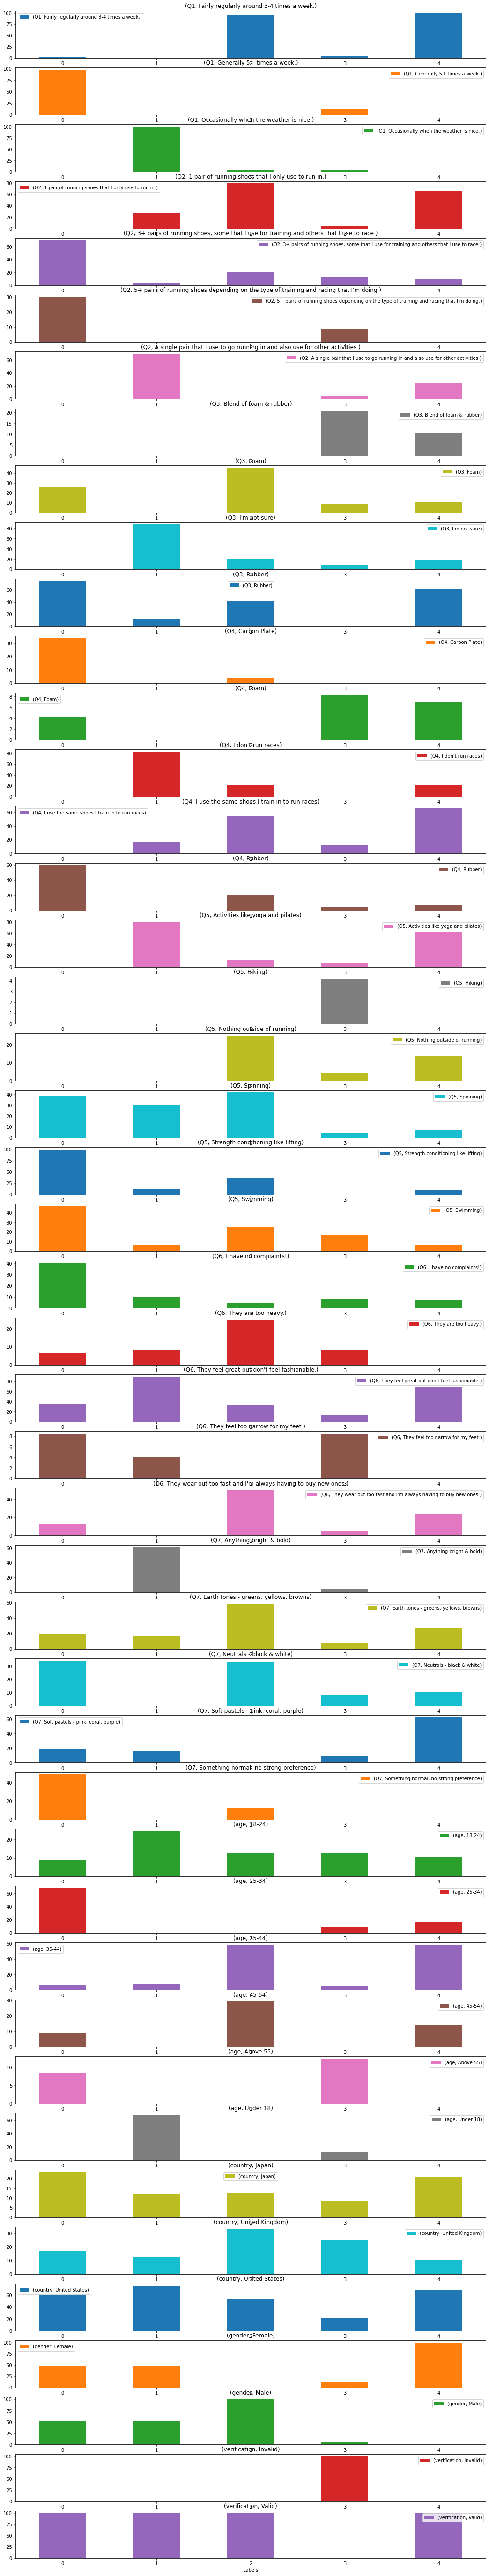

In [214]:
(results.groupby(['Questions', 'Answers']).mean(numeric_only = True)).T.plot(kind = 'bar', subplots = True, rot = 0, figsize = (18,100), sharex =False)
plt.show()

Observations:

* All customers in Cluster 3 have Verification_Invalid.
* All customers in Cluster 2 are Male and have valid verification.
* All customers in Cluster 4 are Females and have valid verification.
* 68% of customers in Cluster 0 are of age group 25-34 and have valid verification.
* Cluster 1 consist of all female customers of age group under 18.